<a href="https://colab.research.google.com/github/josephxlp/PyTorch100Days/blob/main/W2DAY12_XOR_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W2DAY12: XOR Neural Network

Goal - Train a neural network to learn the XOR truth table.

- how to solve the classic XOR problem using a small neural network.
- how non-linear models can learn relationships that linear models cannot.

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
# XOR input and output data
X = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
Y = torch.tensor([[0.], [1.], [1.], [0.]])
X.shape, Y.shape

(torch.Size([4, 2]), torch.Size([4, 1]))

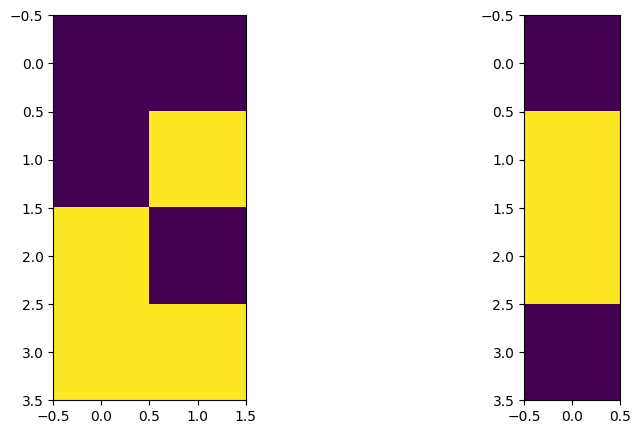

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(X)
ax[1].imshow(Y)

In [11]:
# define a small xor feedforward nn

class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2,4)
        self.fc2 = nn.Linear(4,1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        return torch.sigmoid(self.fc2(x))


In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('device:', device)

device: cpu


In [13]:
model = XORNet().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
# early stopping would be a +

for epoch in range(1000):
    model.train()
    running_loss = 0.0
    # Explicitly name the 'total' argument for clarity and to avoid potential misinterpretation
    for x, y in tqdm(zip(X, Y), total=len(X)):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(X)}')

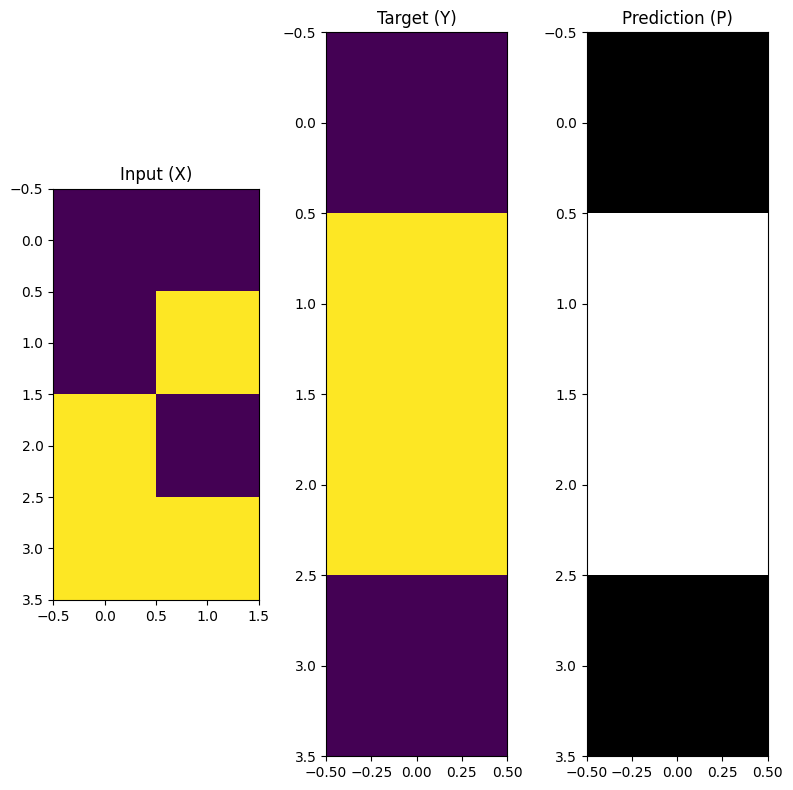

In [22]:
model.eval()
with torch.no_grad():
    P = model(X.to(device))

fig, axes = plt.subplots(1, 3, figsize=(8, 8))

# Plot X
axes[0].imshow(X)
axes[0].set_title('Input (X)')

# Plot Y
axes[1].imshow(Y)
axes[1].set_title('Target (Y)')

# Plot P
axes[2].imshow(P.cpu().numpy() > 0.5, cmap='gray') # Threshold output for visualization
axes[2].set_title('Prediction (P)')

plt.tight_layout()
#plt.show()
